In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import imageio
import glob
import os
import scipy.io
from scipy import signal
from scipy import ndimage
import math
from keras.utils import to_categorical #for one hot encoding
from keras import optimizers

#To make it compatible with jupyter notebook
%matplotlib inline
# Fixing random state for reproducibility\n
np.random.seed(1)

Using TensorFlow backend.


In [0]:
import pickle
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import Model
from keras.utils import np_utils

## Load DataSet

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

In [0]:
train_set_X = train_features
train_set_Y = train_labels
test_set_X = test_features
test_set_Y = test_labels

In [5]:
def print_shapes_of_dataset():
  print("Train X shape: \t" + str(train_set_X.shape))
  print("Train Y shape: \t" + str(train_set_Y.shape))
  print("Test X shape: \t" + str(test_set_X.shape))
  print("Test Y shape: \t" + str(test_set_Y.shape))

print_shapes_of_dataset()

Train X shape: 	(50000, 32, 32, 3)
Train Y shape: 	(50000, 1)
Test X shape: 	(10000, 32, 32, 3)
Test Y shape: 	(10000, 1)


In [6]:
input_shape = train_set_X.shape[1:]
print(input_shape)

(32, 32, 3)


In [7]:
# one hot encode
encoded_train_Y = to_categorical(train_set_Y)
encoded_train_Y = encoded_train_Y.reshape(encoded_train_Y.shape[0], encoded_train_Y.shape[1])

print(encoded_train_Y.shape)

# one hot encode
encoded_test_Y = to_categorical(test_set_Y)
encoded_test_Y = encoded_test_Y.reshape(encoded_test_Y.shape[0], encoded_test_Y.shape[1])

print(encoded_test_Y.shape)

(50000, 10)
(10000, 10)


## Own Network Architecture

In [0]:
#Define model
model = Sequential()

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_1'))

model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_2'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_1'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_3'))

model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_4'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_2'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(128, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_5'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name = 'max_pool_layer_3'))

#Add a layer that will flatten out the tensor
model.add(Flatten(name = 'flatten_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(1024, activation = 'relu', name='dense_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(encoded_train_Y.shape[1], activation = 'softmax',name='final_layer'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer_1 (Conv2D)        (None, 30, 30, 32)        896       
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pool_layer_1 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv_layer_3 (Conv2D)        (None, 12, 12, 64)        18496     
_________________________________________________________________
conv_layer_4 (Conv2D)        (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pool_layer_2 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv_layer_5 (Conv2D)        (None, 3, 3, 128)         73856     
__________

## Training Model

In [0]:
#Compile the model tell which loss to use and the optimizer and a evaluation metric if any
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.SGD(lr=0.0001, decay=1e-6, momentum = 0.9),
              metrics=['accuracy'])

In [11]:
history_1 = model.fit(train_set_X, encoded_train_Y,
          batch_size = 100,
          epochs = 100,
          validation_data = (test_set_X, encoded_test_Y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 13s 257us/step - loss: 1.9612 - acc: 0.2903 - val_loss: 1.7699 - val_acc: 0.3619
Epoch 2/100
29200/50000 [================>.............] - ETA: 4s - loss: 1.7371 - acc: 0.3681

50000/50000 [==============================] - 11s 223us/step - loss: 1.7094 - acc: 0.3791 - val_loss: 1.6697 - val_acc: 0.3982
Epoch 3/100
50000/50000 [==============================] - 11s 222us/step - loss: 1.6064 - acc: 0.4171 - val_loss: 1.5975 - val_acc: 0.4200
Epoch 4/100
45900/50000 [==========================>...] - ETA: 0s - loss: 1.5370 - acc: 0.4429

50000/50000 [==============================] - 11s 223us/step - loss: 1.5345 - acc: 0.4431 - val_loss: 1.5189 - val_acc: 0.4491
Epoch 5/100
50000/50000 [==============================] - 11s 223us/step - loss: 1.4818 - acc: 0.4635 - val_loss: 1.4904 - val_acc: 0.4616
Epoch 6/100
49900/50000 [============================>.] - ETA: 0s - loss: 1.4376 - acc: 0.4830

50000/50000 [==============================] - 11s 222us/step - loss: 1.4376 - acc: 0.4830 - val_loss: 1.4414 - val_acc: 0.4837
Epoch 7/100
50000/50000 [==============================] - 11s 222us/step - loss: 1.3921 - acc: 0.4998 - val_loss: 1.4103 - val_acc: 0.4919
Epoch 8/100
50000/50000 [==============================] - 11s 220us/step - loss: 1.3583 - acc: 0.5172 - val_loss: 1.3695 - val_acc: 0.5120
Epoch 9/100
  100/50000 [..............................] - ETA: 12s - loss: 1.2588 - acc: 0.6200

50000/50000 [==============================] - 11s 221us/step - loss: 1.3254 - acc: 0.5300 - val_loss: 1.3570 - val_acc: 0.5161
Epoch 10/100
50000/50000 [==============================] - 11s 222us/step - loss: 1.2933 - acc: 0.5417 - val_loss: 1.3524 - val_acc: 0.5226
Epoch 11/100
39400/50000 [======================>.......] - ETA: 2s - loss: 1.2656 - acc: 0.5493

50000/50000 [==============================] - 11s 222us/step - loss: 1.2670 - acc: 0.5493 - val_loss: 1.3612 - val_acc: 0.5243
Epoch 12/100
50000/50000 [==============================] - 11s 221us/step - loss: 1.2400 - acc: 0.5616 - val_loss: 1.3144 - val_acc: 0.5281
Epoch 13/100
48100/50000 [===========================>..] - ETA: 0s - loss: 1.2133 - acc: 0.5716

50000/50000 [==============================] - 11s 221us/step - loss: 1.2134 - acc: 0.5717 - val_loss: 1.2700 - val_acc: 0.5452
Epoch 14/100
50000/50000 [==============================] - 11s 222us/step - loss: 1.1928 - acc: 0.5808 - val_loss: 1.2513 - val_acc: 0.5585
Epoch 15/100
50000/50000 [==============================] - 11s 221us/step - loss: 1.1718 - acc: 0.5887 - val_loss: 1.2342 - val_acc: 0.5622


Epoch 16/100
50000/50000 [==============================] - 11s 222us/step - loss: 1.1556 - acc: 0.5927 - val_loss: 1.2277 - val_acc: 0.5650
Epoch 17/100
50000/50000 [==============================] - 11s 223us/step - loss: 1.1343 - acc: 0.6041 - val_loss: 1.2967 - val_acc: 0.5511
Epoch 18/100
34600/50000 [===================>..........] - ETA: 3s - loss: 1.1007 - acc: 0.6123

50000/50000 [==============================] - 11s 222us/step - loss: 1.1100 - acc: 0.6088 - val_loss: 1.1773 - val_acc: 0.5849
Epoch 19/100
50000/50000 [==============================] - 11s 222us/step - loss: 1.1017 - acc: 0.6149 - val_loss: 1.2052 - val_acc: 0.5691
Epoch 20/100
46900/50000 [===========================>..] - ETA: 0s - loss: 1.0801 - acc: 0.6230

50000/50000 [==============================] - 11s 222us/step - loss: 1.0793 - acc: 0.6233 - val_loss: 1.1668 - val_acc: 0.5865
Epoch 21/100
50000/50000 [==============================] - 11s 222us/step - loss: 1.0600 - acc: 0.6293 - val_loss: 1.1642 - val_acc: 0.5909
Epoch 22/100
49900/50000 [============================>.] - ETA: 0s - loss: 1.0507 - acc: 0.6323

50000/50000 [==============================] - 11s 221us/step - loss: 1.0506 - acc: 0.6324 - val_loss: 1.1817 - val_acc: 0.5904
Epoch 23/100
50000/50000 [==============================] - 11s 221us/step - loss: 1.0303 - acc: 0.6408 - val_loss: 1.2221 - val_acc: 0.5648
Epoch 24/100
50000/50000 [==============================] - 11s 223us/step - loss: 1.0180 - acc: 0.6465 - val_loss: 1.1646 - val_acc: 0.5936


Epoch 25/100
50000/50000 [==============================] - 11s 221us/step - loss: 1.0022 - acc: 0.6504 - val_loss: 1.1440 - val_acc: 0.6034
Epoch 26/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.9899 - acc: 0.6550 - val_loss: 1.1546 - val_acc: 0.5978
Epoch 27/100
33900/50000 [===================>..........] - ETA: 3s - loss: 0.9728 - acc: 0.6600

50000/50000 [==============================] - 11s 222us/step - loss: 0.9758 - acc: 0.6595 - val_loss: 1.1392 - val_acc: 0.6010
Epoch 28/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.9632 - acc: 0.6657 - val_loss: 1.1432 - val_acc: 0.5988
Epoch 29/100
47100/50000 [===========================>..] - ETA: 0s - loss: 0.9477 - acc: 0.6701

50000/50000 [==============================] - 11s 220us/step - loss: 0.9480 - acc: 0.6698 - val_loss: 1.1152 - val_acc: 0.6156
Epoch 30/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.9376 - acc: 0.6744 - val_loss: 1.1197 - val_acc: 0.6136
Epoch 31/100
49900/50000 [============================>.] - ETA: 0s - loss: 0.9258 - acc: 0.6803

50000/50000 [==============================] - 11s 221us/step - loss: 0.9257 - acc: 0.6803 - val_loss: 1.1079 - val_acc: 0.6156
Epoch 32/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.9150 - acc: 0.6833 - val_loss: 1.1017 - val_acc: 0.6206
Epoch 33/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.9066 - acc: 0.6868 - val_loss: 1.1197 - val_acc: 0.6104


Epoch 34/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.8900 - acc: 0.6909 - val_loss: 1.1351 - val_acc: 0.6115
Epoch 35/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.8811 - acc: 0.6967 - val_loss: 1.0849 - val_acc: 0.6260
Epoch 36/100
34600/50000 [===================>..........] - ETA: 3s - loss: 0.8606 - acc: 0.7007

50000/50000 [==============================] - 11s 221us/step - loss: 0.8699 - acc: 0.6976 - val_loss: 1.1156 - val_acc: 0.6175
Epoch 37/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.8598 - acc: 0.7038 - val_loss: 1.0790 - val_acc: 0.6252
Epoch 38/100
46600/50000 [==========================>...] - ETA: 0s - loss: 0.8510 - acc: 0.7064

50000/50000 [==============================] - 11s 222us/step - loss: 0.8512 - acc: 0.7066 - val_loss: 1.0998 - val_acc: 0.6239
Epoch 39/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.8397 - acc: 0.7091 - val_loss: 1.1123 - val_acc: 0.6250
Epoch 40/100
49700/50000 [============================>.] - ETA: 0s - loss: 0.8278 - acc: 0.7155

50000/50000 [==============================] - 11s 222us/step - loss: 0.8278 - acc: 0.7155 - val_loss: 1.0805 - val_acc: 0.6310
Epoch 41/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.8192 - acc: 0.7173 - val_loss: 1.0794 - val_acc: 0.6319
Epoch 42/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.8152 - acc: 0.7195 - val_loss: 1.0777 - val_acc: 0.6330
Epoch 43/100
  100/50000 [..............................] - ETA: 11s - loss: 0.9620 - acc: 0.6500

50000/50000 [==============================] - 11s 221us/step - loss: 0.8013 - acc: 0.7224 - val_loss: 1.1279 - val_acc: 0.6197
Epoch 44/100
50000/50000 [==============================] - 11s 223us/step - loss: 0.7939 - acc: 0.7255 - val_loss: 1.0827 - val_acc: 0.6336
Epoch 45/100
39300/50000 [======================>.......] - ETA: 2s - loss: 0.7746 - acc: 0.7308

50000/50000 [==============================] - 11s 221us/step - loss: 0.7797 - acc: 0.7297 - val_loss: 1.0980 - val_acc: 0.6281
Epoch 46/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.7677 - acc: 0.7360 - val_loss: 1.1015 - val_acc: 0.6332
Epoch 47/100
48300/50000 [===========================>..] - ETA: 0s - loss: 0.7624 - acc: 0.7376

50000/50000 [==============================] - 11s 222us/step - loss: 0.7625 - acc: 0.7377 - val_loss: 1.0946 - val_acc: 0.6333
Epoch 48/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.7506 - acc: 0.7412 - val_loss: 1.0895 - val_acc: 0.6354
Epoch 49/100
49900/50000 [============================>.] - ETA: 0s - loss: 0.7416 - acc: 0.7431

50000/50000 [==============================] - 11s 222us/step - loss: 0.7415 - acc: 0.7432 - val_loss: 1.1123 - val_acc: 0.6316
Epoch 50/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.7350 - acc: 0.7461 - val_loss: 1.0972 - val_acc: 0.6365
Epoch 51/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.7235 - acc: 0.7508 - val_loss: 1.1389 - val_acc: 0.6262
Epoch 52/100
  100/50000 [..............................] - ETA: 12s - loss: 0.9760 - acc: 0.6700

50000/50000 [==============================] - 11s 222us/step - loss: 0.7129 - acc: 0.7541 - val_loss: 1.0867 - val_acc: 0.6402
Epoch 53/100
50000/50000 [==============================] - 11s 223us/step - loss: 0.7047 - acc: 0.7598 - val_loss: 1.1089 - val_acc: 0.6366
Epoch 54/100
38700/50000 [======================>.......] - ETA: 2s - loss: 0.6940 - acc: 0.7593

50000/50000 [==============================] - 11s 222us/step - loss: 0.6937 - acc: 0.7596 - val_loss: 1.1287 - val_acc: 0.6343
Epoch 55/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.6900 - acc: 0.7631 - val_loss: 1.1056 - val_acc: 0.6391
Epoch 56/100
48100/50000 [===========================>..] - ETA: 0s - loss: 0.6813 - acc: 0.7646

50000/50000 [==============================] - 11s 220us/step - loss: 0.6816 - acc: 0.7647 - val_loss: 1.1451 - val_acc: 0.6320
Epoch 57/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.6713 - acc: 0.7691 - val_loss: 1.1172 - val_acc: 0.6393
Epoch 58/100
49800/50000 [============================>.] - ETA: 0s - loss: 0.6634 - acc: 0.7721

50000/50000 [==============================] - 11s 222us/step - loss: 0.6631 - acc: 0.7723 - val_loss: 1.1149 - val_acc: 0.6367
Epoch 59/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.6533 - acc: 0.7747 - val_loss: 1.1215 - val_acc: 0.6419
Epoch 60/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.6428 - acc: 0.7800 - val_loss: 1.1643 - val_acc: 0.6378


Epoch 61/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.6398 - acc: 0.7805 - val_loss: 1.1377 - val_acc: 0.6387
Epoch 62/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.6250 - acc: 0.7844 - val_loss: 1.1371 - val_acc: 0.6422
Epoch 63/100
34300/50000 [===================>..........] - ETA: 3s - loss: 0.6147 - acc: 0.7882

50000/50000 [==============================] - 11s 222us/step - loss: 0.6193 - acc: 0.7864 - val_loss: 1.1550 - val_acc: 0.6372
Epoch 64/100
50000/50000 [==============================] - 11s 223us/step - loss: 0.6086 - acc: 0.7899 - val_loss: 1.1555 - val_acc: 0.6363
Epoch 65/100
46700/50000 [===========================>..] - ETA: 0s - loss: 0.6030 - acc: 0.7933

50000/50000 [==============================] - 11s 221us/step - loss: 0.6050 - acc: 0.7922 - val_loss: 1.1432 - val_acc: 0.6405
Epoch 66/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.5936 - acc: 0.7962 - val_loss: 1.1705 - val_acc: 0.6378
Epoch 67/100
49600/50000 [============================>.] - ETA: 0s - loss: 0.5921 - acc: 0.7960

50000/50000 [==============================] - 11s 222us/step - loss: 0.5925 - acc: 0.7962 - val_loss: 1.1686 - val_acc: 0.6385
Epoch 68/100
50000/50000 [==============================] - 11s 223us/step - loss: 0.5745 - acc: 0.8019 - val_loss: 1.1566 - val_acc: 0.6428
Epoch 69/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.5720 - acc: 0.8038 - val_loss: 1.1953 - val_acc: 0.6369


Epoch 70/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.5600 - acc: 0.8073 - val_loss: 1.1847 - val_acc: 0.6387
Epoch 71/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.5572 - acc: 0.8073 - val_loss: 1.1649 - val_acc: 0.6429
Epoch 72/100
34600/50000 [===================>..........] - ETA: 3s - loss: 0.5404 - acc: 0.8172

50000/50000 [==============================] - 11s 221us/step - loss: 0.5453 - acc: 0.8149 - val_loss: 1.2166 - val_acc: 0.6354
Epoch 73/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.5385 - acc: 0.8150 - val_loss: 1.1950 - val_acc: 0.6389
Epoch 74/100
46800/50000 [===========================>..] - ETA: 0s - loss: 0.5309 - acc: 0.8154

50000/50000 [==============================] - 11s 222us/step - loss: 0.5304 - acc: 0.8160 - val_loss: 1.1967 - val_acc: 0.6401
Epoch 75/100
50000/50000 [==============================] - 11s 223us/step - loss: 0.5270 - acc: 0.8197 - val_loss: 1.1852 - val_acc: 0.6421
Epoch 76/100
49700/50000 [============================>.] - ETA: 0s - loss: 0.5151 - acc: 0.8248

50000/50000 [==============================] - 11s 221us/step - loss: 0.5154 - acc: 0.8247 - val_loss: 1.2265 - val_acc: 0.6368
Epoch 77/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.5079 - acc: 0.8260 - val_loss: 1.2503 - val_acc: 0.6342
Epoch 78/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.5000 - acc: 0.8279 - val_loss: 1.2347 - val_acc: 0.6383


Epoch 79/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.4887 - acc: 0.8312 - val_loss: 1.2308 - val_acc: 0.6423
Epoch 80/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.4879 - acc: 0.8325 - val_loss: 1.2309 - val_acc: 0.6409
Epoch 81/100
34600/50000 [===================>..........] - ETA: 3s - loss: 0.4687 - acc: 0.8392

50000/50000 [==============================] - 11s 222us/step - loss: 0.4732 - acc: 0.8379 - val_loss: 1.2480 - val_acc: 0.6401
Epoch 82/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.4638 - acc: 0.8410 - val_loss: 1.2736 - val_acc: 0.6365
Epoch 83/100
47100/50000 [===========================>..] - ETA: 0s - loss: 0.4596 - acc: 0.8430

50000/50000 [==============================] - 11s 222us/step - loss: 0.4580 - acc: 0.8440 - val_loss: 1.2856 - val_acc: 0.6348
Epoch 84/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.4486 - acc: 0.8463 - val_loss: 1.3039 - val_acc: 0.6338
Epoch 85/100
49700/50000 [============================>.] - ETA: 0s - loss: 0.4461 - acc: 0.8479

50000/50000 [==============================] - 11s 220us/step - loss: 0.4464 - acc: 0.8477 - val_loss: 1.3038 - val_acc: 0.6353
Epoch 86/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.4328 - acc: 0.8522 - val_loss: 1.3071 - val_acc: 0.6390
Epoch 87/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.4268 - acc: 0.8539 - val_loss: 1.3517 - val_acc: 0.6308
Epoch 88/100
  100/50000 [..............................] - ETA: 12s - loss: 0.3880 - acc: 0.9000

50000/50000 [==============================] - 11s 223us/step - loss: 0.4229 - acc: 0.8558 - val_loss: 1.3630 - val_acc: 0.6335
Epoch 89/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.4108 - acc: 0.8605 - val_loss: 1.3665 - val_acc: 0.6315
Epoch 90/100
39000/50000 [======================>.......] - ETA: 2s - loss: 0.4040 - acc: 0.8603

50000/50000 [==============================] - 11s 223us/step - loss: 0.4060 - acc: 0.8594 - val_loss: 1.3647 - val_acc: 0.6337
Epoch 91/100
50000/50000 [==============================] - 11s 223us/step - loss: 0.3975 - acc: 0.8644 - val_loss: 1.3453 - val_acc: 0.6394
Epoch 92/100
47800/50000 [===========================>..] - ETA: 0s - loss: 0.3875 - acc: 0.8665

50000/50000 [==============================] - 11s 222us/step - loss: 0.3882 - acc: 0.8660 - val_loss: 1.3458 - val_acc: 0.6421
Epoch 93/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.3771 - acc: 0.8727 - val_loss: 1.3886 - val_acc: 0.6378
Epoch 94/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.3772 - acc: 0.8717 - val_loss: 1.3921 - val_acc: 0.6374


Epoch 95/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.3616 - acc: 0.8780 - val_loss: 1.4182 - val_acc: 0.6357
Epoch 96/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.3599 - acc: 0.8782 - val_loss: 1.4010 - val_acc: 0.6389
Epoch 97/100
34300/50000 [===================>..........] - ETA: 3s - loss: 0.3464 - acc: 0.8836

50000/50000 [==============================] - 11s 221us/step - loss: 0.3524 - acc: 0.8807 - val_loss: 1.4355 - val_acc: 0.6386
Epoch 98/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.3388 - acc: 0.8866 - val_loss: 1.4738 - val_acc: 0.6280
Epoch 99/100
47200/50000 [===========================>..] - ETA: 0s - loss: 0.3381 - acc: 0.8835

50000/50000 [==============================] - 11s 222us/step - loss: 0.3410 - acc: 0.8824 - val_loss: 1.4933 - val_acc: 0.6296
Epoch 100/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.3275 - acc: 0.8896 - val_loss: 1.4727 - val_acc: 0.6375


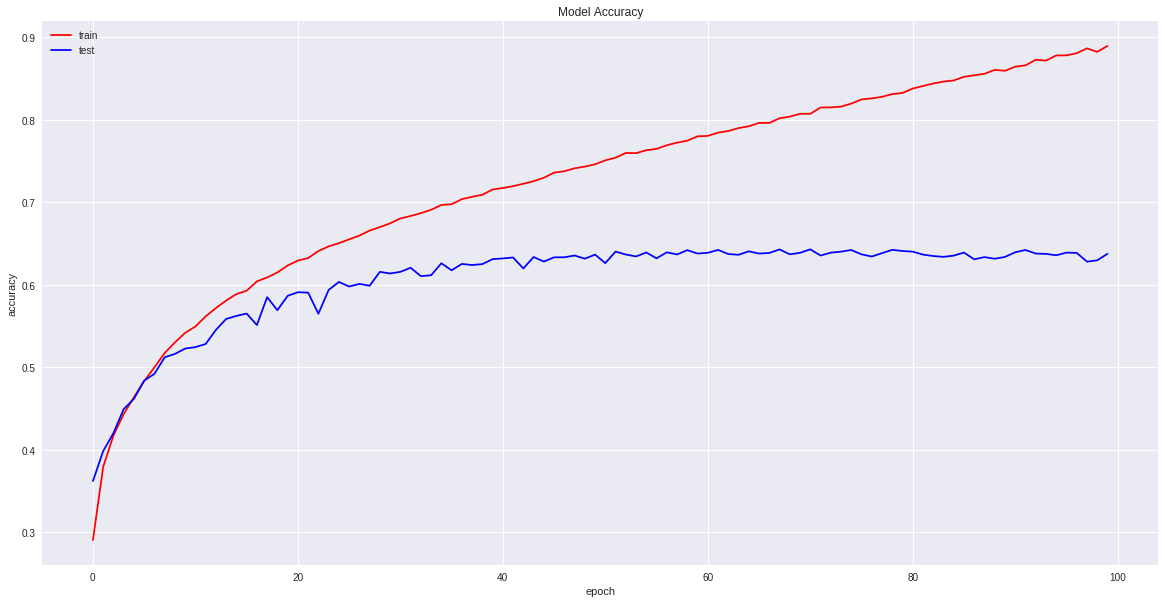

In [12]:
# list all data in history
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history_1.history['acc'], color = 'r')
plt.plot(history_1.history['val_acc'], color = 'b')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


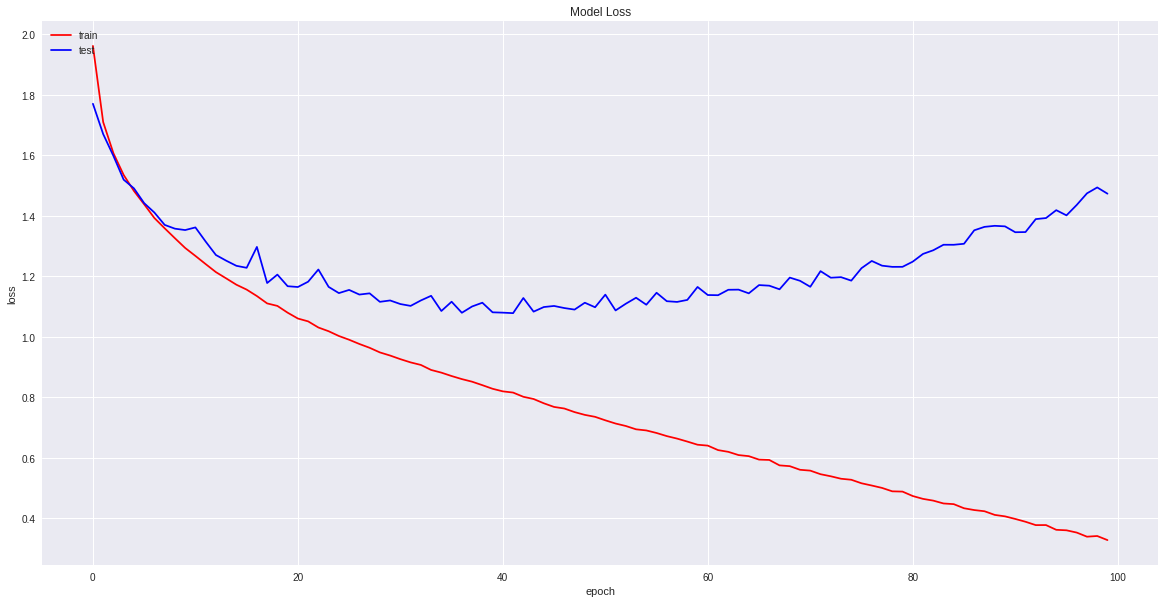

In [13]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history_1.history['loss'], color = 'r')
plt.plot(history_1.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()